In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [2]:
df = pd.read_csv("movies_metadata.csv", low_memory=False)
df = df[['title', 'overview']].dropna()
df['title'] = df['title'].astype(str).str.lower().str.strip()
df = pd.read_csv("movies_metadata.csv", low_memory=False)

df = df[['title', 'overview']].dropna()

df['title'] = df['title'].astype(str).str.lower().str.strip()

df = df.head(2000)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])


In [4]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [5]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [6]:
def recommend(title, cosine_sim=cosine_sim):
    title = title.lower().strip()  
    idx = indices.get(title)

    if idx is None:
        return "❌ Movie not found. Please try another title."

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:6]
    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices].str.title().tolist()


In [7]:
recommend("Heat")

['Mi Vida Loca',
 'Taxi Driver',
 'Beautiful Thing',
 'Benny & Joon',
 'Mulholland Falls']

In [8]:
import pandas as pd

df = pd.read_csv("movies_metadata.csv", low_memory=False)


In [10]:
import ast

def extract_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return ", ".join([g['name'] for g in genres])
    except:
        return ""

df['genres_cleaned'] = df['genres'].apply(extract_genres)


In [11]:
from collections import Counter

genre_list = df['genres_cleaned'].dropna().str.split(', ')
flat_genres = [genre for sublist in genre_list for genre in sublist]

genre_counts = Counter(flat_genres)

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False).head(10)


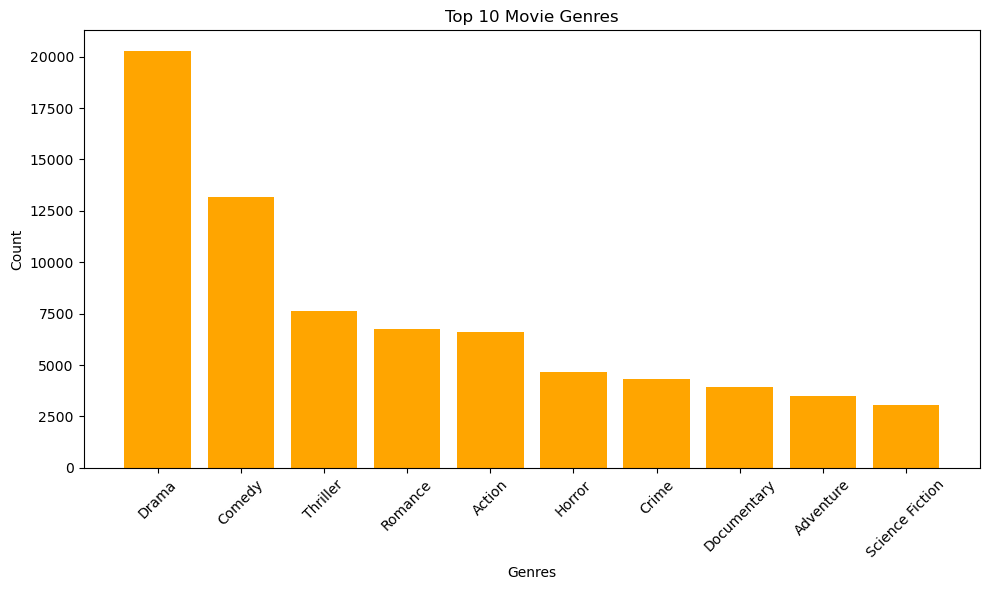

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(genre_df['Genre'], genre_df['Count'], color='orange')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
!pip install wordcloud

C:\Users\ritti\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


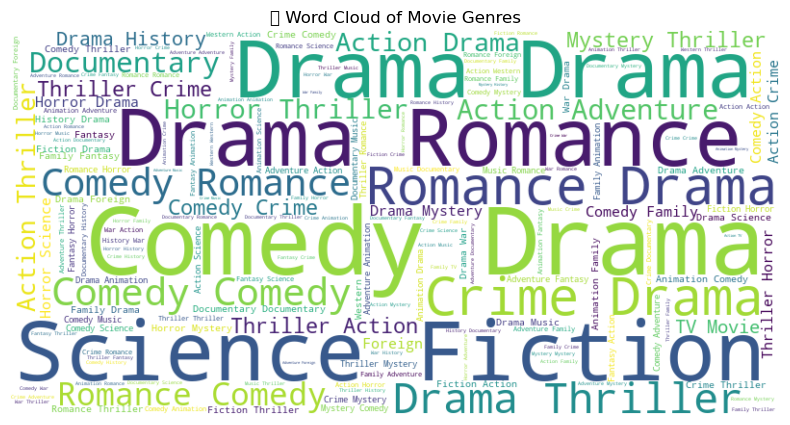

In [14]:
from wordcloud import WordCloud

genre_text = " ".join(flat_genres)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("🎨 Word Cloud of Movie Genres")
plt.show()


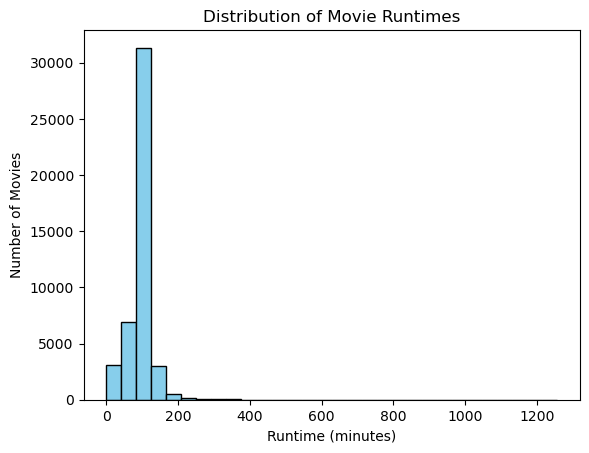

In [15]:
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['runtime'].dropna().plot.hist(bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Movies")
plt.show()


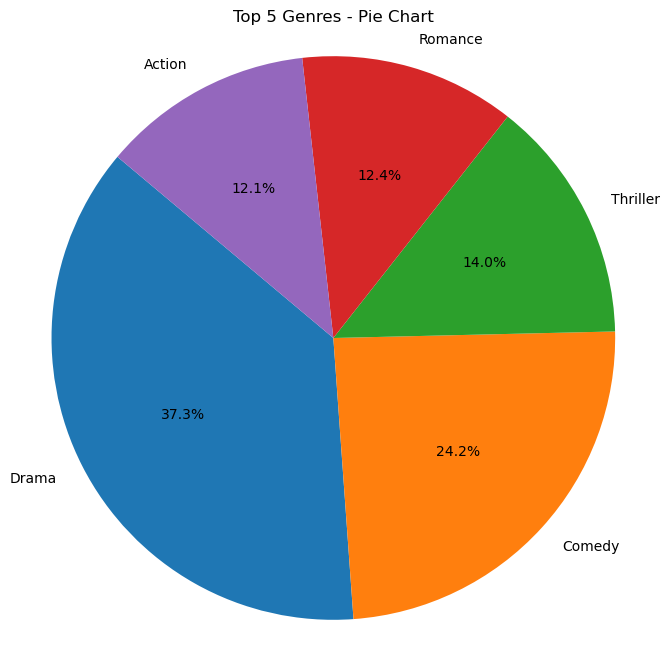

In [16]:
top5 = genre_df.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top5['Count'], labels=top5['Genre'], autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Genres - Pie Chart")
plt.axis('equal')
plt.show()


C:\Users\ritti\AppData\Local\Temp\ipykernel_5112\1410725066.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="plasma")
C:\Users\ritti\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


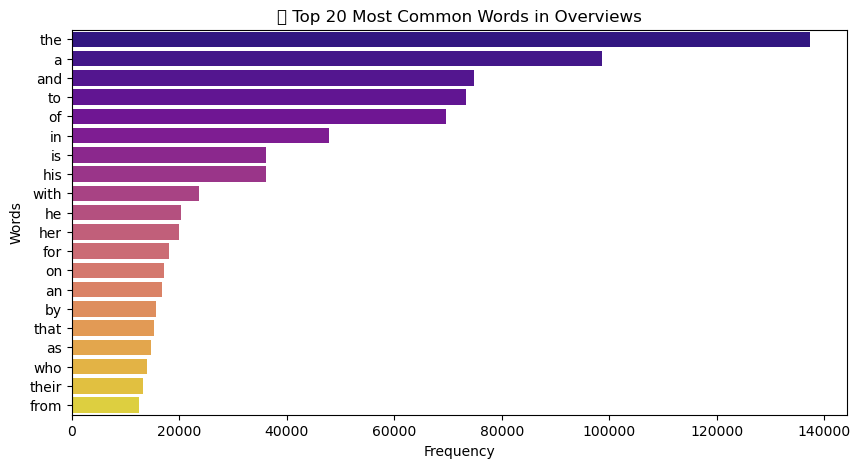

In [21]:
from collections import Counter
import seaborn as sns

all_words = " ".join(df['overview'].dropna()).lower().split()
common_words = Counter(all_words).most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words), palette="plasma")
plt.title("🔤 Top 20 Most Common Words in Overviews")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


C:\Users\ritti\AppData\Local\Temp\ipykernel_5112\1028286312.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='overview_length', y='title', data=top_long_overviews, palette="viridis")
C:\Users\ritti\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


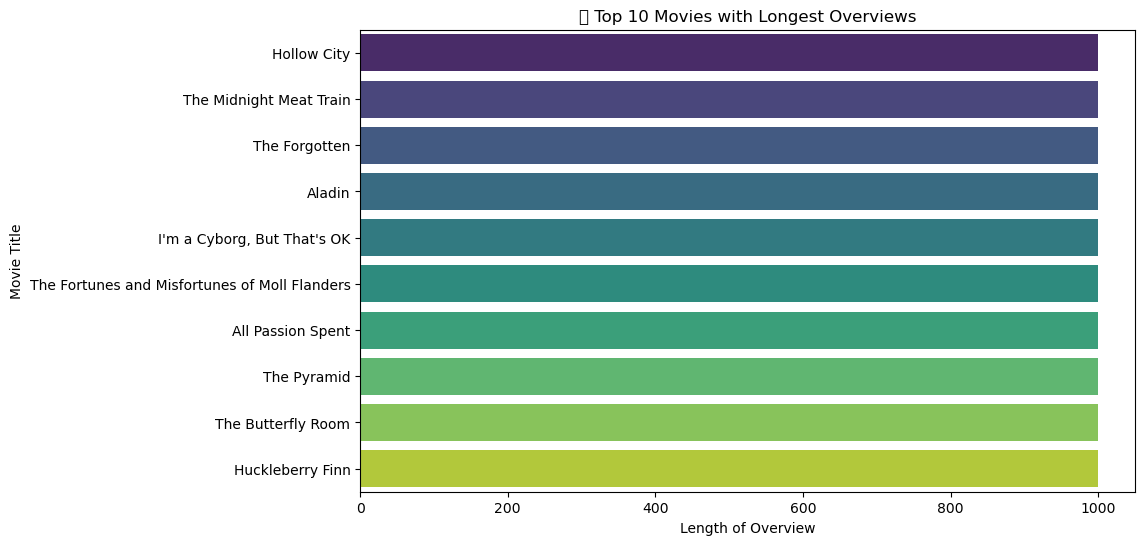

In [22]:
df['overview_length'] = df['overview'].dropna().apply(lambda x: len(x))
top_long_overviews = df.sort_values(by='overview_length', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='overview_length', y='title', data=top_long_overviews, palette="viridis")
plt.title("📚 Top 10 Movies with Longest Overviews")
plt.xlabel("Length of Overview")
plt.ylabel("Movie Title")
plt.show()

C:\Users\ritti\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


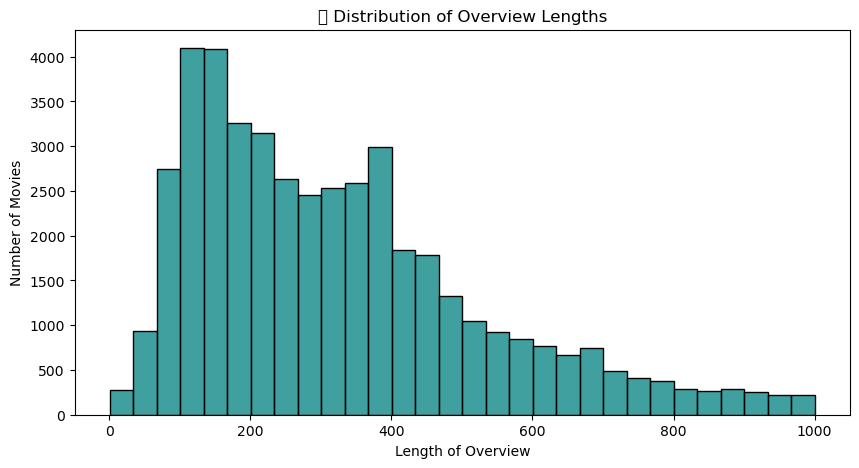

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(df['overview'].dropna().apply(len), bins=30, color='teal')
plt.title("📏 Distribution of Overview Lengths")
plt.xlabel("Length of Overview")
plt.ylabel("Number of Movies")
plt.show()